In [1]:
# based on:
# https://matplotlib.org/stable/gallery/mplot3d/voxels_torus.html
# https://matplotlib.org/stable/gallery/mplot3d/voxels_rgb.html
# https://matplotlib.org/stable/gallery/mplot3d/voxels_numpy_logo.html

In [14]:
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np

## Torus

In [15]:
def midpoints(x):
    sl = ()
    for i in range(x.ndim):
        x = (x[sl + np.index_exp[:-1]] + x[sl + np.index_exp[1:]]) / 2.0
        sl += np.index_exp[:]
    return x

In [16]:
# prepare some coordinates, and attach rgb values to each
r, theta, z = np.mgrid[0:1:11j, 0 : np.pi * 2 : 25j, -0.5:0.5:11j]
x = r * np.cos(theta)
y = r * np.sin(theta)

rc, thetac, zc = midpoints(r), midpoints(theta), midpoints(z)

In [17]:
# define a wobbly torus about [0.7, *, 0]
sphere = (rc - 0.7) ** 2 + (zc + 0.2 * np.cos(thetac * 2)) ** 2 < 0.2**2

In [18]:
# combine the color components
hsv = np.zeros(sphere.shape + (3,))
hsv[..., 0] = thetac / (np.pi * 2)
hsv[..., 1] = rc
hsv[..., 2] = zc + 0.5
colors = matplotlib.colors.hsv_to_rgb(hsv)

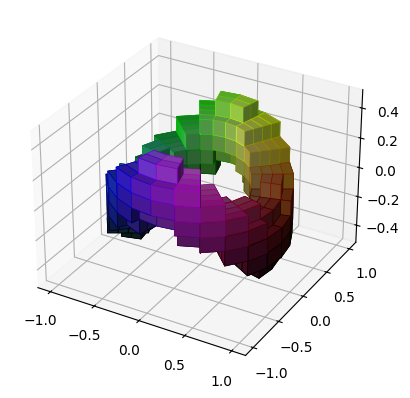

In [19]:
# and plot everything
ax = plt.figure().add_subplot(projection="3d")
ax.voxels(
    x,
    y,
    z,
    sphere,
    facecolors=colors,
    edgecolors=np.clip(2 * colors - 0.5, 0, 1),  # brighter
    linewidth=0.5,
)

plt.show()

## RGB

In [20]:
def midpoints(x):
    sl = ()
    for _ in range(x.ndim):
        x = (x[sl + np.index_exp[:-1]] + x[sl + np.index_exp[1:]]) / 2.0
        sl += np.index_exp[:]
    return x

In [21]:
# prepare some coordinates, and attach rgb values to each
r, g, b = np.indices((17, 17, 17)) / 16.0
rc = midpoints(r)
gc = midpoints(g)
bc = midpoints(b)

In [22]:
# define a sphere about [0.5, 0.5, 0.5]
sphere = (rc - 0.5) ** 2 + (gc - 0.5) ** 2 + (bc - 0.5) ** 2 < 0.5**2

In [23]:
# combine the color components
colors = np.zeros(sphere.shape + (3,))
colors[..., 0] = rc
colors[..., 1] = gc
colors[..., 2] = bc

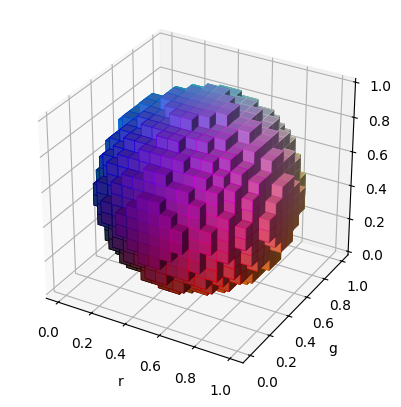

In [24]:
# and plot everything
ax = plt.figure().add_subplot(projection="3d")
ax.voxels(
    r,
    g,
    b,
    sphere,
    facecolors=colors,
    edgecolors=np.clip(2 * colors - 0.5, 0, 1),  # brighter
    linewidth=0.5,
)
ax.set(xlabel="r", ylabel="g", zlabel="b")
ax.set_aspect("equal")

plt.show()

## Numpy logo

In [3]:
def explode(data):
    size = np.array(data.shape) * 2
    data_e = np.zeros(size - 1, dtype=data.dtype)
    data_e[::2, ::2, ::2] = data
    return data_e

In [5]:
# build up the numpy logo
n_voxels = np.zeros((4, 3, 4), dtype=bool)
n_voxels[0, 0, :] = True
n_voxels[-1, 0, :] = True
n_voxels[1, 0, 2] = True
n_voxels[2, 0, 1] = True
facecolors = np.where(n_voxels, "#FFD65DC0", "#7A88CCC0")
edgecolors = np.where(n_voxels, "#BFAB6E", "#7D84A6")
filled = np.ones(n_voxels.shape)

In [6]:
# upscale the above voxel image, leaving gaps
filled_2 = explode(filled)
fcolors_2 = explode(facecolors)
ecolors_2 = explode(edgecolors)

In [8]:
# Shrink the gaps
x, y, z = np.indices(np.array(filled_2.shape) + 1).astype(float) // 2
x[0::2, :, :] += 0.05
y[:, 0::2, :] += 0.05
z[:, :, 0::2] += 0.05
x[1::2, :, :] += 0.95
y[:, 1::2, :] += 0.95
z[:, :, 1::2] += 0.95

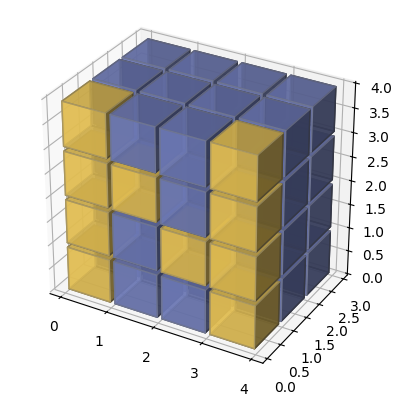

In [10]:
ax = plt.figure().add_subplot(projection="3d")
ax.voxels(x, y, z, filled_2, facecolors=fcolors_2, edgecolors=ecolors_2)
ax.set_aspect("equal")
plt.show()